In [32]:
# Cell 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
# Cell 2: Load dataset
digits = load_digits()
X, y = digits.data, digits.target

In [33]:
# Convert to DataFrame
df = pd.DataFrame(X, columns=[f"pixel_{i}" for i in range(X.shape[1])])
df["target"] = y

# Show first 5 rows
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pixel_0   1797 non-null   float64
 1   pixel_1   1797 non-null   float64
 2   pixel_2   1797 non-null   float64
 3   pixel_3   1797 non-null   float64
 4   pixel_4   1797 non-null   float64
 5   pixel_5   1797 non-null   float64
 6   pixel_6   1797 non-null   float64
 7   pixel_7   1797 non-null   float64
 8   pixel_8   1797 non-null   float64
 9   pixel_9   1797 non-null   float64
 10  pixel_10  1797 non-null   float64
 11  pixel_11  1797 non-null   float64
 12  pixel_12  1797 non-null   float64
 13  pixel_13  1797 non-null   float64
 14  pixel_14  1797 non-null   float64
 15  pixel_15  1797 non-null   float64
 16  pixel_16  1797 non-null   float64
 17  pixel_17  1797 non-null   float64
 18  pixel_18  1797 non-null   float64
 19  pixel_19  1797 non-null   float64
 20  pixel_20  1797 non-null   floa

In [35]:
print(df.describe())

       pixel_0      pixel_1      pixel_2      pixel_3      pixel_4  \
count   1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean       0.0     0.303840     5.204786    11.835838    11.848080   
std        0.0     0.907192     4.754826     4.248842     4.287388   
min        0.0     0.000000     0.000000     0.000000     0.000000   
25%        0.0     0.000000     1.000000    10.000000    10.000000   
50%        0.0     0.000000     4.000000    13.000000    13.000000   
75%        0.0     0.000000     9.000000    15.000000    15.000000   
max        0.0     8.000000    16.000000    16.000000    16.000000   

           pixel_5      pixel_6      pixel_7      pixel_8      pixel_9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.00

In [11]:
# Cell 2: Basic dataset info
print("Shape of feature matrix:", X.shape)    # (1797, 64)
print("Shape of target vector:", y.shape)     # (1797,)
print("Number of classes:", len(np.unique(y)))
print("Classes:", np.unique(y))


Shape of feature matrix: (1797, 64)
Shape of target vector: (1797,)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


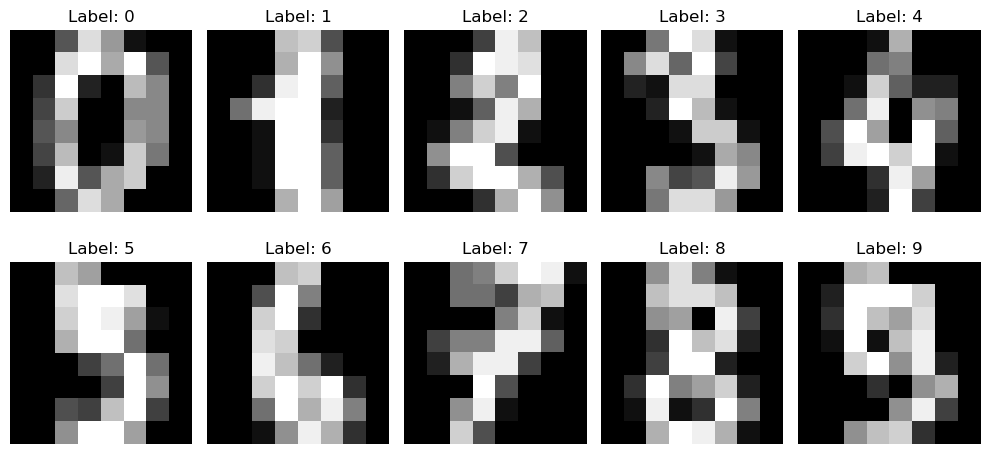

In [10]:
# Cell 3: Visualize some digit samples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()


/tmp/ipykernel_27724/4036859029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


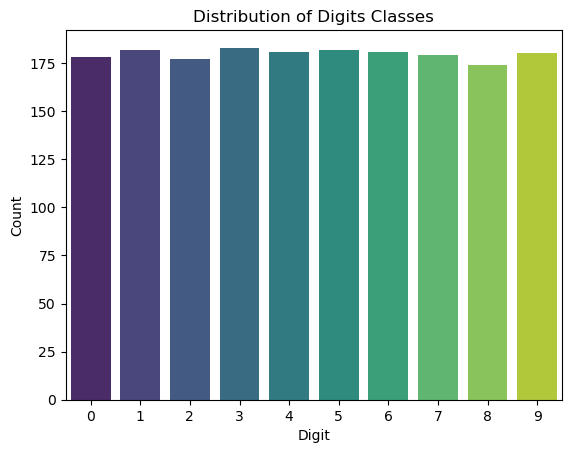

In [15]:
# Cell 4: Distribution of classes
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Digits Classes")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

Number of features (pixels): 64
Pixel value range: 0.0 to 16.0


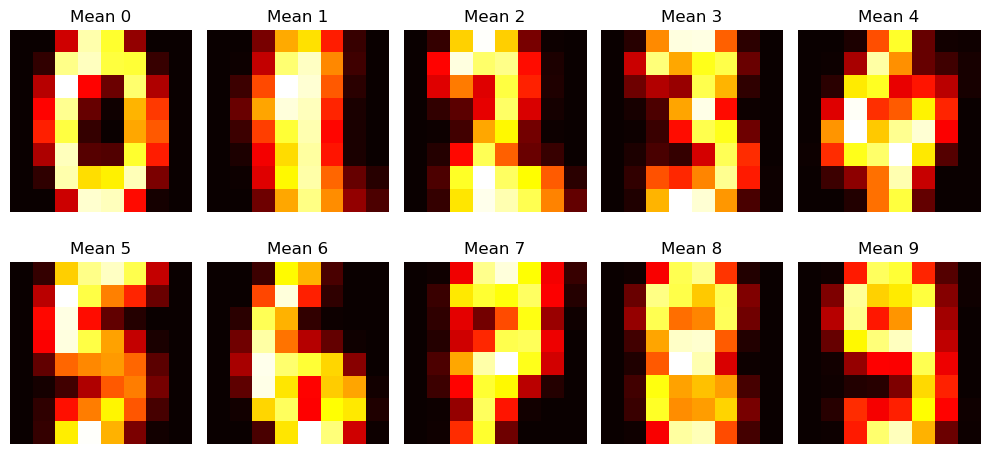

In [16]:
# Cell 5: Feature analysis
print("Number of features (pixels):", X.shape[1])
print("Pixel value range:", X.min(), "to", X.max())

# Show mean image for each digit
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for digit in range(10):
    mean_img = X[y == digit].mean(axis=0).reshape(8,8)
    ax = axes[digit//5, digit%5]
    ax.imshow(mean_img, cmap="hot")
    ax.set_title(f"Mean {digit}")
    ax.axis("off")
plt.tight_layout()
plt.show()


/home/gato/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/gato/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


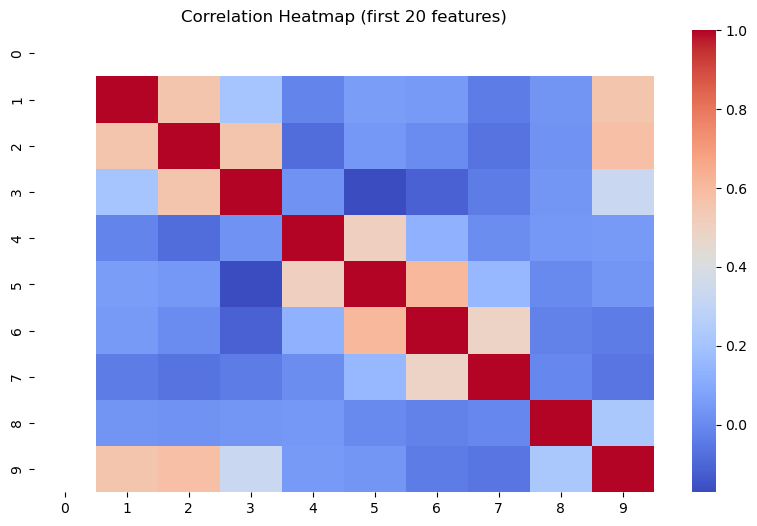

In [37]:
# Cell 6: Correlation heatmap (between first 20 features just for visualization)
plt.figure(figsize=(10,6))
sns.heatmap(np.corrcoef(X[:, :10].T), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (first 20 features)")
plt.show()

In [25]:
# Cell 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=None)

In [26]:
# Cell 4: Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [27]:
# Cell 5: Evaluate model
y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8518518518518519


In [28]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.86      0.74      0.80        50
           2       0.86      0.66      0.75        47
           3       0.95      0.76      0.85        54
           4       0.98      0.85      0.91        60
           5       0.94      0.94      0.94        66
           6       0.89      0.96      0.93        53
           7       0.72      0.98      0.83        55
           8       0.57      0.91      0.70        43
           9       0.89      0.71      0.79        59

    accuracy                           0.85       540
   macro avg       0.87      0.85      0.85       540
weighted avg       0.88      0.85      0.85       540



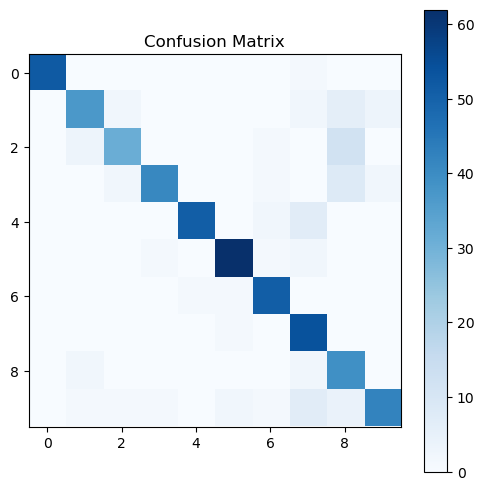

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

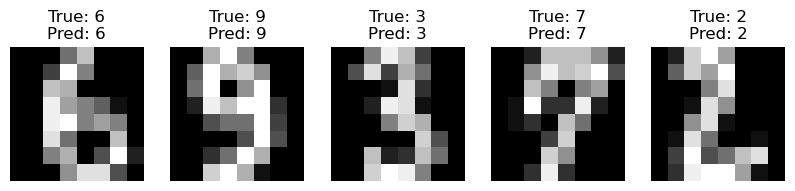

In [30]:
# Cell 6: Visualize some predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8,8), cmap="gray")
    ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    ax.axis("off")
plt.show()


### Let’s take one sample row from the DataFrame (or from X) and reshape it back into an 8×8 image so you can see what the pixel values represent.

In [38]:
# Cell 1: Take one sample (e.g., the first row)
sample_index = 0
sample_pixels = X[sample_index]   # 64 pixel values
sample_label = y[sample_index]    # true target digit

print("Pixel values (first 10):", sample_pixels[:10])
print("True label:", sample_label)


Pixel values (first 10): [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]
True label: 0


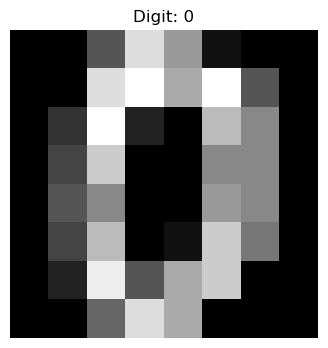

In [39]:
# Cell 2: Reshape back into 8x8 image
sample_image = sample_pixels.reshape(8, 8)

plt.figure(figsize=(4,4))
plt.imshow(sample_image, cmap="gray")
plt.title(f"Digit: {sample_label}")
plt.axis("off")
plt.show()


In [40]:
# Cell 3: Display as DataFrame (to see raw numbers)
pd.DataFrame(sample_image)

,0,1,2,3,4,5,6,7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0
1,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0
2,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0
3,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0
4,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0
5,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0
6,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0
7,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
